In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# 数据加载

In [86]:
trainDataFrame = pd.read_csv('./train.csv')
trainDataFrame.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [87]:
testDataFrame = pd.read_csv('./test.csv')
testDataFrame.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# 数据描述
 - PassengerId 每位乘客的唯一 ID。每个 Id 采用 gggg_pp 的形式，其中 gggg 表示乘客旅行的组，pp 是他们在组中的编号。群体中的人通常是家庭成员，但并非总是如此。
 - HomePlanet 乘客离开的星球，通常是他们的永久居住星球。
 - CryoSleep - 指示乘客是否选择在航行期间进入假死状态。处于低温睡眠状态的乘客被限制在他们的客舱内。
 - Cabin - 乘客入住的客舱编号。采用deck/num/side 形式，其中side 可以是P 代表左舷或S 代表右舷。
 - Destination - 乘客将要去的星球。
 - Age - 乘客的年龄。
 - VIP - 乘客在航程中是否支付了特殊的 VIP 服务费用。
 - RoomService、FoodCourt、ShoppingMall、Spa、VRDeck - 乘客在泰坦尼克号宇宙飞船的众多豪华设施中所支付的金额。
 - Name - 乘客的名字和姓氏。
 - Transported - 乘客是否被运送到另一个维度。这是目标，您要预测的列。


# 数据探索

In [88]:
trainDataFrame.shape

(8693, 14)

In [89]:
testDataFrame.shape

(4277, 13)

In [90]:
trainDataFrame.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [91]:
testDataFrame.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [92]:
testDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


# 数据可视化

d:\anaconda\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


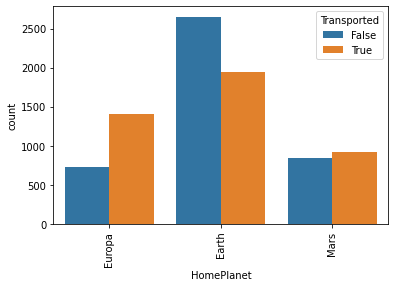

d:\anaconda\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


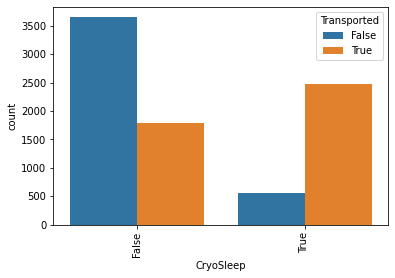

d:\anaconda\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


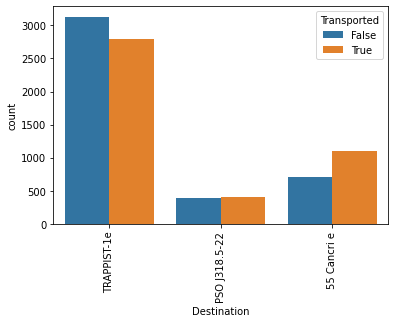

d:\anaconda\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


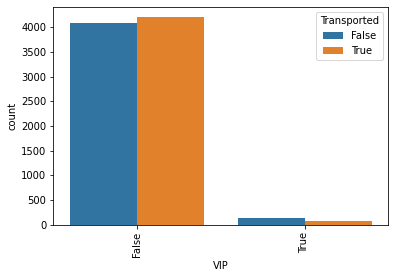

In [93]:
#尝试找一些类别属性的数据与是否被传送有关
def plotCategoricalDataTransported(param):
    graph = sns.countplot(trainDataFrame[param],hue=trainDataFrame.Transported)
    plt.xticks(rotation = 90)
    plt.show()
attributes = ['HomePlanet','CryoSleep','Destination','VIP']
for attribute in attributes:
    plotCategoricalDataTransported(attribute)



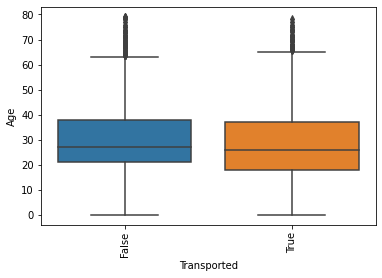

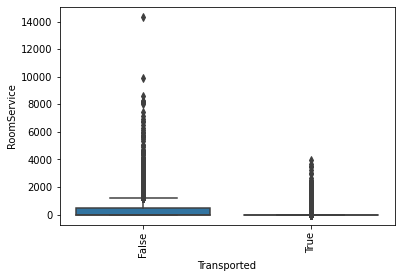

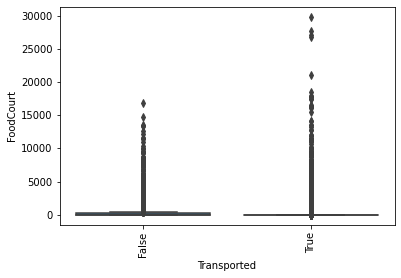

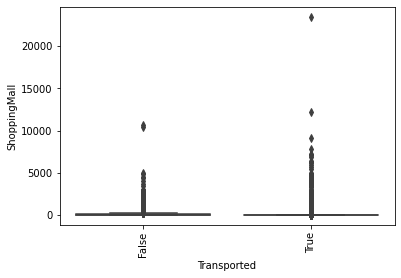

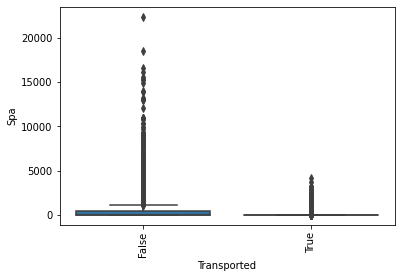

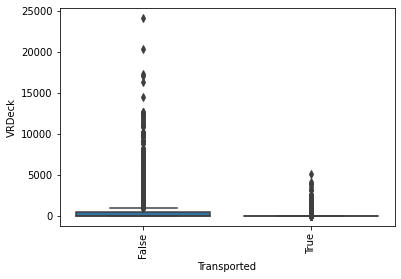

In [94]:
#尝试找数值数据与是否被传送有关
def plotNumericalDataTransported(param):
    graph = sns.boxplot(y=trainDataFrame[param],x=trainDataFrame.Transported)
    plt.xticks(rotation = 90)
    plt.show()
attributes = ['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for attribute in attributes:
    plotNumericalDataTransported(attribute)


# 数据补全

In [95]:
#查看训练集缺失数据
trainDataFrame.isna().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [96]:
#查看测试集合缺失数据
testDataFrame.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [97]:
#这些奢侈性消费缺失值补0
trainDataFrame[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = trainDataFrame[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
testDataFrame[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = testDataFrame[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [98]:
#目的地由于地球最多，所以缺失值都补为地球
trainDataFrame['HomePlanet'] = trainDataFrame['HomePlanet'].fillna('Erath')
testDataFrame['HomePlanet'] = testDataFrame['HomePlanet'].fillna('Erath')

In [99]:
#缺失年龄的填中位数，按始发地各自星球的情况补充缺失值
cond1 = trainDataFrame['HomePlanet'] == 'Earth'
cond2 = trainDataFrame['HomePlanet'] == 'Europa'
cond3 = trainDataFrame['HomePlanet'] == 'Mars'
trainDataFrame['Age'].fillna(cond1.map({True:trainDataFrame.loc[trainDataFrame['HomePlanet'] == 'Earth']['Age'].median()}),inplace=True)
trainDataFrame['Age'].fillna(cond2.map({True:trainDataFrame.loc[trainDataFrame['HomePlanet'] == 'Europa']['Age'].median()}),inplace=True)
trainDataFrame['Age'].fillna(cond3.map({True:trainDataFrame.loc[trainDataFrame['HomePlanet'] == 'Mars']['Age'].median()}),inplace=True)
#对测试集做相同处理
cond1 = testDataFrame['HomePlanet'] == 'Earth'
cond2 = testDataFrame['HomePlanet'] == 'Europa'
cond3 = testDataFrame['HomePlanet'] == 'Mars'
testDataFrame['Age'].fillna(cond1.map({True:testDataFrame.loc[testDataFrame['HomePlanet'] == 'Earth']['Age'].median()}),inplace=True)
testDataFrame['Age'].fillna(cond2.map({True:testDataFrame.loc[testDataFrame['HomePlanet'] == 'Europa']['Age'].median()}),inplace=True)
testDataFrame['Age'].fillna(cond3.map({True:testDataFrame.loc[testDataFrame['HomePlanet'] == 'Mars']['Age'].median()}),inplace=True)


In [100]:
#VIP数据缺失的补为False
trainDataFrame['VIP'] = trainDataFrame['VIP'].fillna(False)
testDataFrame['VIP'] = trainDataFrame['VIP'].fillna(False)

In [101]:
#目的地补全,最常见目的地为TRAPPIST-1e
#trainDataFrame['Destination'].describe().sum
trainDataFrame['Destination'] = trainDataFrame['Destination'].fillna('TRAPPIST-1e')
testDataFrame['Destination'] = trainDataFrame['Destination'].fillna('TRAPPIST-1e')

In [102]:
#是否进入休眠数据补全
trainDataFrame['CryoSleep'] = trainDataFrame['CryoSleep'].fillna(False)
testDataFrame['CryoSleep'] = testDataFrame['CryoSleep'].fillna(False)

In [103]:
#舱位补全
trainDataFrame['Cabin'] = trainDataFrame['Cabin'].fillna('G/734/S')
testDataFrame['Cabin'] = testDataFrame['Cabin'].fillna('G/734/S')

In [104]:
#把PassengerId作为默认Id
trainDataFrame.set_index('PassengerId',inplace=True)
testDataFrame.set_index('PassengerId',inplace=True)

In [105]:
#把Cabin分开为Deck/Num/Side三个属性
trainDataFrame[['Deck','Num','Side']] = trainDataFrame.Cabin.str.split('/',expand=True)
testDataFrame[['Deck','Num','Side']] = testDataFrame.Cabin.str.split('/',expand=True)

In [106]:
trainDataFrame[['Deck','Num','Side']].describe().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Deck   Num  Side
count   8693  8693  8693
unique     8  1817     2
top        F   734     S
freq    2794   208  4487>

In [107]:
#删除表头
trainDataFrame= trainDataFrame.drop(['Name','Cabin','Num'],axis=1)
testDataFrame= testDataFrame.drop(['Name','Cabin','Num'],axis=1)

In [108]:
cat_attributes= ['HomePlanet','CryoSleep','Destination','VIP','Deck','Side']
for i in cat_attributes:
    le=LabelEncoder()
    arr=np.concatenate((trainDataFrame[i], testDataFrame[i])).astype(str)
    le.fit(arr)
    trainDataFrame[i]=le.transform(trainDataFrame[i].astype(str))
    testDataFrame[i]=le.transform(testDataFrame[i].astype(str))

In [109]:
trainDataFrame['Transported']=trainDataFrame['Transported'].replace({True:1,False:0})

In [110]:
X=trainDataFrame.drop('Transported',axis=1)
y=trainDataFrame['Transported']

In [111]:
X.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Side'],
      dtype='object')

In [112]:
#train_test_split()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

In [113]:
#Models
from pyexpat import model


models=[]
models.append(('DT',DecisionTreeClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier()))
models.append(('MLP',MLPClassifier(random_state=1, max_iter=3000)))

In [114]:

X_train['Age'] = X_train['Age'].fillna(X_train['Age'].median())


In [115]:
#Evaluation of models
results=[]
names=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10)#random_state=1
    cv_results=cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name,cv_results.mean(),cv_results.std()))

DT: 0.739528 (0.010641)
LDA: 0.762381 (0.018406)
KNN: 0.777417 (0.013525)
NB: 0.703479 (0.014104)
SVM: 0.741984 (0.012921)
RFC: 0.794445 (0.009002)
MLP: 0.749962 (0.020048)


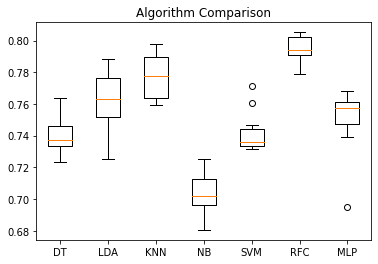

In [116]:
plt.boxplot(results,labels=names)
plt.title("Algorithm Comparison")
plt.show()